In [4]:
# To interface with Excel
library(openxlsx)

# For data manipulation & visualization
library(tidyverse)

# For "tidying" regression output
library(broom)

# Borrow a tidyverse dataset
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


### The `data` worksheet

First we'll set up objects referring to our workbook and worksheet, respectively. 

In [5]:
# Add workbook
wb <- createWorkbook()

# Add worksheet of raw data
data_sheet <- addWorksheet(wb, sheetName = 'data')

Next, we'll use the `writeDataTable()` function to write `diamonds` to this worksheet as an Excel table. 

In [6]:
# Exclude row names
writeDataTable(wb, sheet = data_sheet, x = diamonds, rowNames = FALSE)

### The `analysis` worksheet

I would also like to include an `analysis` worksheet including regression results and a scatterplot of the relationship between the log of `price` and the log of `carat`. 

We can set up a new worksheet, add the results of the regression with `writeData()` and add the scatterplot with `writePlot()` 

In [7]:
# Set up a new worksheet 
analysis_sheet <- addWorksheet(wb, sheetName = 'analysis')

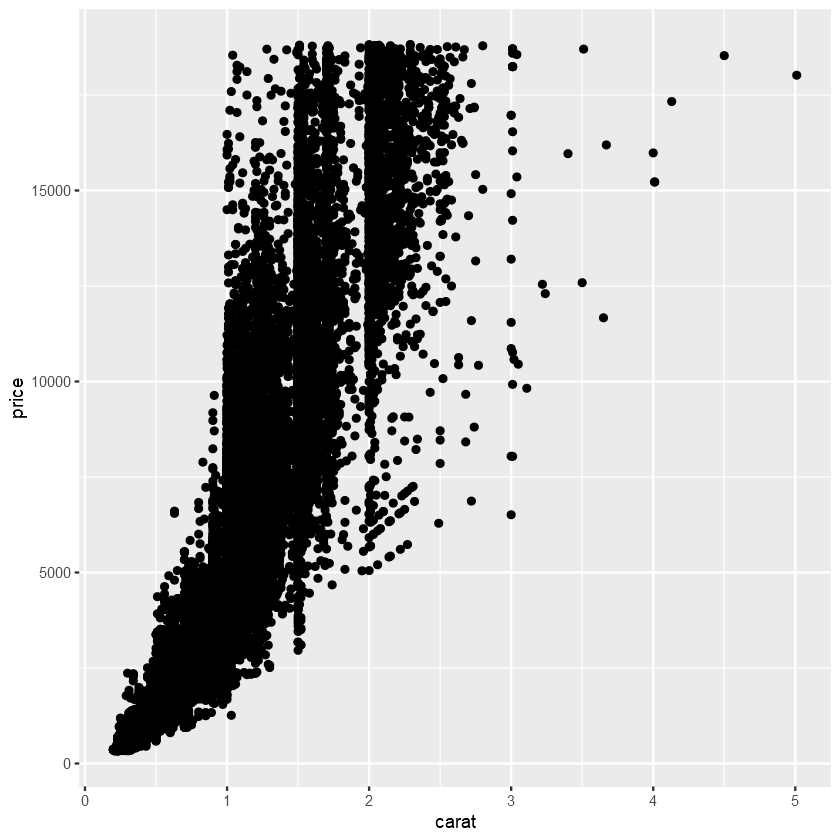

In [8]:
# Untransformed relationship
ggplot(data = diamonds, aes(x = carat, y = price)) +
    geom_point() 

In [9]:
# Log transformations
diamonds <- diamonds %>% 
  mutate(carat_log = log(carat)) %>% 
  mutate(price_log = log(price))

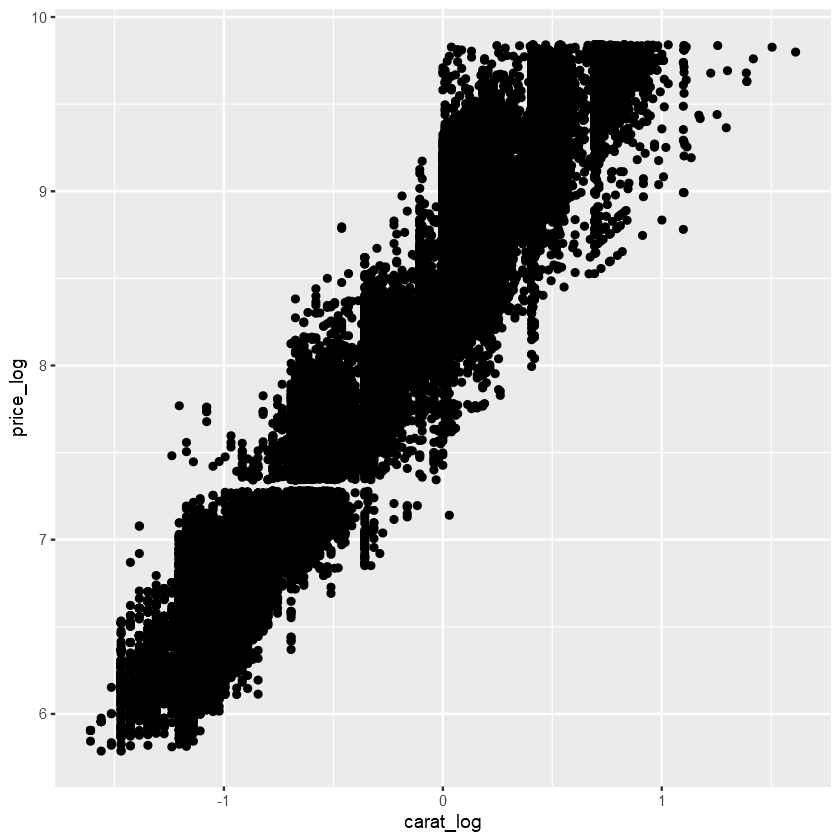

In [10]:
# Transformed relationship
ggplot(data = diamonds, aes(x = carat_log, y = price_log)) +
    geom_point() 

In [11]:
# Linear regression -- price "by" carat
diamonds_lm <- lm(price ~ carat, data = diamonds)

# Clean up the regression output
diamonds_lm_tidy <- tidy(diamonds_lm)
diamonds_lm_tidy


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2256.361,13.05535,-172.8304,0
carat,7756.426,14.06658,551.4081,0


In [12]:
# Add the table to this worksheet
writeDataTable(wb, sheet = analysis_sheet, x = diamonds_lm_tidy, rowNames = FALSE)

`geom_smooth()` using formula 'y ~ x'



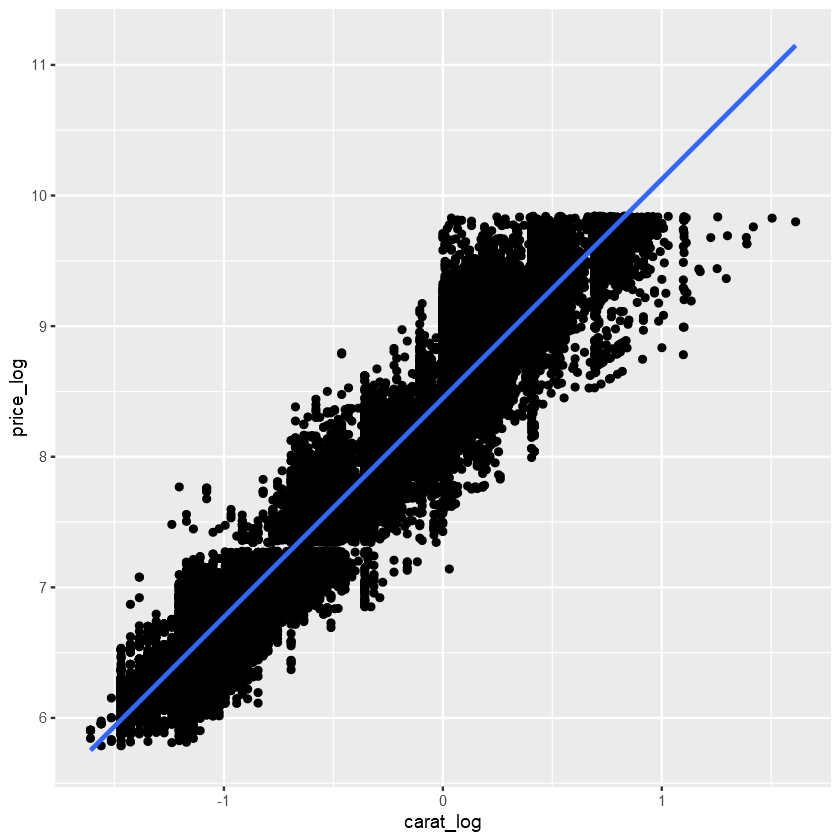

In [13]:
# Visualize the results with regression trendline
ggplot(data = diamonds, aes(x = carat_log, y = price_log)) +
    geom_point() +
    geom_smooth(method = 'lm')


# Add the image to the worksheet, set the placement
insertPlot(wb, sheet = analysis_sheet, startRow = 5, startCol = "A", width = 4, height = 4)

### Admire our work, part 1

OK, let's save and view our work. By default, `saveWorkbook()` will put the file in our working directory.

Let's take a look at the finished output in Excel.

In [14]:
diamonds_report = 'output/diamonds-report.xlsx'

# save workbook to working directory
saveWorkbook(wb = wb, file = diamonds_report, overwrite = TRUE)

It's pretty good! But as a matter of fact I would like to do a few more things to the workbook:

- Freeze panes
- Format the `price` as currency in the `data` worksheet. 

Let's give it a go:

In [15]:
# Freeze panes

for (sheet in getSheetNames(diamonds_report)){
    freezePane(wb, sheet = sheet, firstRow = TRUE)
}

In [12]:
# Set currency style to price column

currency <- createStyle(numFmt = "$#,##0")
addStyle(wb, sheet = data_sheet, style = currency, cols = which(colnames(diamonds) == 'price'), 2:(nrow(mpg) + 1))

Let's try this again!

In [13]:
saveWorkbook(wb = wb, file = diamonds_report, overwrite = TRUE)

# See you back at the slides for the conclusion